<a href="https://colab.research.google.com/github/ankitaattavar/Supervsied-ML-algorithms/blob/main/Copy_of_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [ ]:
# Encoding Gender
from sklearn import preprocessing
  
le=preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
y=df['Purchased']
x=df[['Gender','Age','EstimatedSalary']]
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 
x_train

,Gender,Age,EstimatedSalary
250,0,44,39000
63,1,32,120000
312,0,38,50000
159,0,32,135000
283,0,52,21000
...,...,...,...
323,0,48,30000
192,1,29,43000
117,1,36,52000
47,0,27,54000


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.98019606,  0.58164944, -0.88670699],
       [ 1.02020406, -0.60673761,  1.46173768],
       [-0.98019606, -0.01254409, -0.5677824 ],
       [-0.98019606, -0.60673761,  1.89663484],
       [-0.98019606,  1.37390747, -1.40858358],
       [-0.98019606,  1.47293972,  0.99784738],
       [ 1.02020406,  0.08648817, -0.79972756],
       [ 1.02020406, -0.01254409, -0.24885782],
       [-0.98019606, -0.21060859, -0.5677824 ],
       [-0.98019606, -0.21060859, -0.19087153],
       [-0.98019606, -0.30964085, -1.29261101],
       [ 1.02020406, -0.30964085, -0.5677824 ],
       [ 1.02020406,  0.38358493,  0.09905991],
       [-0.98019606,  0.8787462 , -0.59677555],
       [-0.98019606,  2.06713324, -1.17663843],
       [ 1.02020406,  1.07681071, -0.13288524],
       [-0.98019606,  0.68068169,  1.78066227],
       [-0.98019606, -0.70576986,  0.56295021],
       [-0.98019606,  0.77971394,  0.35999821],
       [-0.98019606,  0.8787462 , -0.53878926],
       [ 1.02020406, -1.20093113, -1.582

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(x_train, y_train) 

DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

**Making the Confusion Matrix**

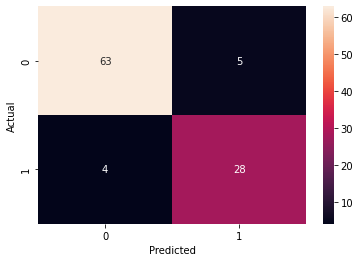

In [ ]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.91


In [ ]:
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))

Test set auc: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


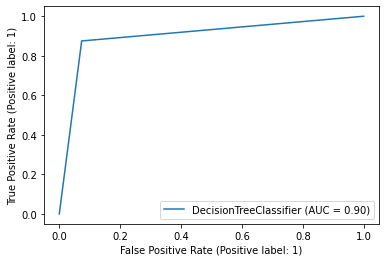

In [ ]:
plot_roc_curve(dt, x_test, y_test)


**Visualising the Training set results**

In [ ]:
acc = roc_auc_score(y_train, dt.predict(x_train))
print("Train set AUC : ", acc)

Train set AUC :  1.0


In [ ]:
#Reducing overfitting
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train)) 
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x, y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))



Depth  :  1  Training Accuracy :  0.82  Cross val score :  0.825
Depth  :  2  Training Accuracy :  0.91  Cross val score :  0.8949999999999999
Depth  :  3  Training Accuracy :  0.9166666666666666  Cross val score :  0.85
Depth  :  4  Training Accuracy :  0.9333333333333333  Cross val score :  0.8724999999999999
Depth  :  5  Training Accuracy :  0.9433333333333334  Cross val score :  0.8675
Depth  :  6  Training Accuracy :  0.9566666666666667  Cross val score :  0.8625
Depth  :  7  Training Accuracy :  0.9633333333333334  Cross val score :  0.8625
Depth  :  8  Training Accuracy :  0.9766666666666667  Cross val score :  0.8525
Depth  :  9  Training Accuracy :  0.98  Cross val score :  0.845
Depth  :  10  Training Accuracy :  0.9933333333333333  Cross val score :  0.8474999999999999
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.835


**Visualising the Test set results**

In [ ]:
#feature importance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
# Fit dt to the training set
dt.fit(x_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,x_test.columns)) # it calculates the feature importances based on IG

[(0.0, 'Gender'),
 (0.5611909829592391, 'Age'),
 (0.438809017040761, 'EstimatedSalary')]

[Text(0.5, 0.8333333333333334, 'X[1] <= 44.5\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.25, 0.5, 'X[2] <= 90500.0\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(0.75, 0.5, 'X[1] <= 46.5\ngini = 0.275\nsamples = 85\nvalue = [14, 71]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.205\nsamples = 69\nvalue = [8, 61]')]

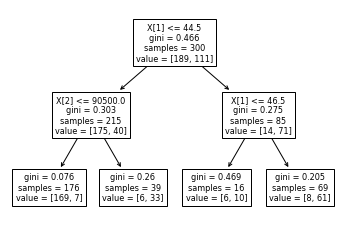

In [ ]:
from sklearn import tree
tree.plot_tree(dt) 

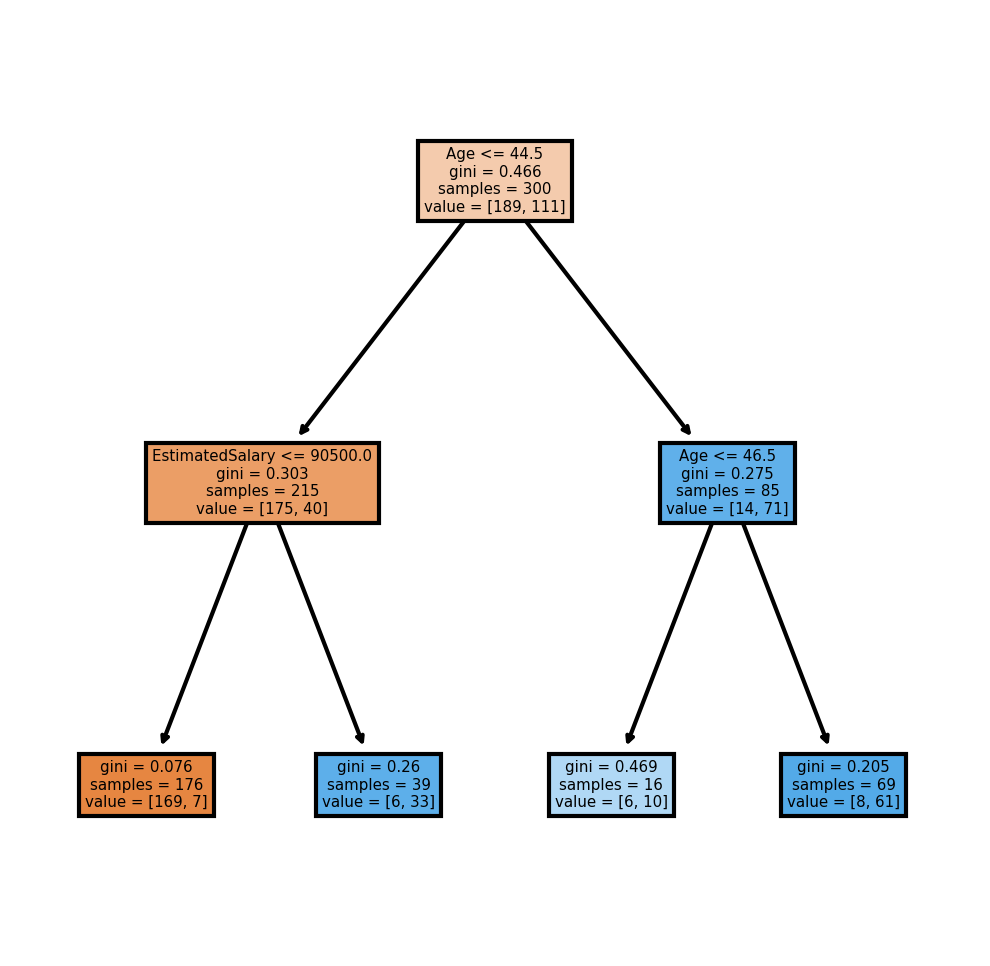

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = x_test.columns,
               filled = True);
fig.savefig('imagename.png')